In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('logistic_regression.csv')

In [3]:
df.head()

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
0,10000.0,36 months,11.44,329.48,B,B4,Marketing,10+ years,RENT,117000.0,...,16.0,0.0,36369.0,41.8,25.0,w,INDIVIDUAL,0.0,0.0,"0174 Michelle Gateway\r\nMendozaberg, OK 22690"
1,8000.0,36 months,11.99,265.68,B,B5,Credit analyst,4 years,MORTGAGE,65000.0,...,17.0,0.0,20131.0,53.3,27.0,f,INDIVIDUAL,3.0,0.0,"1076 Carney Fort Apt. 347\r\nLoganmouth, SD 05113"
2,15600.0,36 months,10.49,506.97,B,B3,Statistician,< 1 year,RENT,43057.0,...,13.0,0.0,11987.0,92.2,26.0,f,INDIVIDUAL,0.0,0.0,"87025 Mark Dale Apt. 269\r\nNew Sabrina, WV 05113"
3,7200.0,36 months,6.49,220.65,A,A2,Client Advocate,6 years,RENT,54000.0,...,6.0,0.0,5472.0,21.5,13.0,f,INDIVIDUAL,0.0,0.0,"823 Reid Ford\r\nDelacruzside, MA 00813"
4,24375.0,60 months,17.27,609.33,C,C5,Destiny Management Inc.,9 years,MORTGAGE,55000.0,...,13.0,0.0,24584.0,69.8,43.0,f,INDIVIDUAL,1.0,0.0,"679 Luna Roads\r\nGreggshire, VA 11650"


In [4]:
df.columns

Index(['loan_amnt', 'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'title',
       'dti', 'earliest_cr_line', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'application_type',
       'mort_acc', 'pub_rec_bankruptcies', 'address'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 396030 entries, 0 to 396029
Data columns (total 27 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   loan_amnt             396030 non-null  float64
 1   term                  396030 non-null  object 
 2   int_rate              396030 non-null  float64
 3   installment           396030 non-null  float64
 4   grade                 396030 non-null  object 
 5   sub_grade             396030 non-null  object 
 6   emp_title             373103 non-null  object 
 7   emp_length            377729 non-null  object 
 8   home_ownership        396030 non-null  object 
 9   annual_inc            396030 non-null  float64
 10  verification_status   396030 non-null  object 
 11  issue_d               396030 non-null  object 
 12  loan_status           396030 non-null  object 
 13  purpose               396030 non-null  object 
 14  title                 394275 non-null  object 
 15  

In [6]:
# emp_title, emp_length, title,revo_util,mort_acc and pub_rec_bankruptcies  data are discriminated,
# data type of loan issue_d, earliest_cr_line to be changed from obj to date-time

SyntaxError: invalid syntax (1711507662.py, line 2)

In [7]:
df.describe(include='all')

,loan_amnt,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,...,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,application_type,mort_acc,pub_rec_bankruptcies,address
count,396030.000000,396030,396030.000000,396030.000000,396030,396030,373103,377729,396030,3.960300e+05,...,396030.000000,396030.000000,3.960300e+05,395754.000000,396030.000000,396030,396030,358235.000000,395495.000000,396030
unique,NaN,2,NaN,NaN,7,35,173105,11,6,NaN,...,NaN,NaN,NaN,NaN,NaN,2,3,NaN,NaN,393700
top,NaN,36 months,NaN,NaN,B,B3,Teacher,10+ years,MORTGAGE,NaN,...,NaN,NaN,NaN,NaN,NaN,f,INDIVIDUAL,NaN,NaN,USCGC Smith\r\nFPO AE 70466
freq,NaN,302005,NaN,NaN,116018,26655,4389,126041,198348,NaN,...,NaN,NaN,NaN,NaN,NaN,238066,395319,NaN,NaN,8
mean,14113.888089,NaN,13.639400,431.849698,NaN,NaN,NaN,NaN,NaN,7.420318e+04,...,11.311153,0.178191,1.584454e+04,53.791749,25.414744,NaN,NaN,1.813991,0.121648,NaN
std,8357.441341,NaN,4.472157,250.727790,NaN,NaN,NaN,NaN,NaN,6.163762e+04,...,5.137649,0.530671,2.059184e+04,24.452193,11.886991,NaN,NaN,2.147930,0.356174,NaN
min,500.000000,NaN,5.320000,16.080000,NaN,NaN,NaN,NaN,NaN,0.000000e+00,...,0.000000,0.000000,0.000000e+00,0.000000,2.000000,NaN,NaN,0.000000,0.000000,NaN
25%,8000.000000,NaN,10.490000,250.330000,NaN,NaN,NaN,NaN,NaN,4.500000e+04,...,8.000000,0.000000,6.025000e+03,35.800000,17.000000,NaN,NaN,0.000000,0.000000,NaN
50%,12000.000000,NaN,13.330000,375.430000,NaN,NaN,NaN,NaN,NaN,6.400000e+04,...,10.000000,0.000000,1.118100e+04,54.800000,24.000000,NaN,NaN,1.000000,0.000000,NaN
75%,20000.000000,NaN,16.490000,567.300000,NaN,NaN,NaN,NaN,NaN,9.000000e+04,...,14.000000,0.000000,1.962000e+04,72.900000,32.000000,NaN,NaN,3.000000,0.000000,NaN


In [8]:
import seaborn as sns
from scipy import stats 
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, classification_report, 
    roc_auc_score, roc_curve, auc,
    ConfusionMatrixDisplay, RocCurveDisplay
)
from statsmodels.stats.outliers_influence import variance_inflation_factor
from imblearn.over_sampling import SMOTE

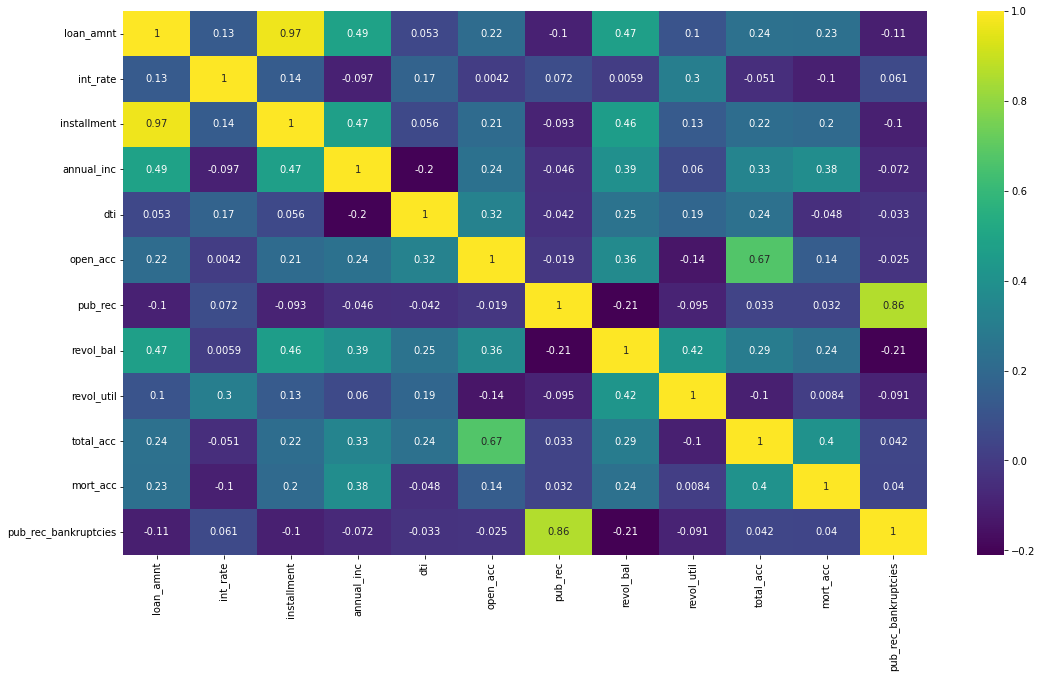

In [9]:
import warnings
warnings.filterwarnings("ignore")
# Correlation Heatmap
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

notice almost perfect correlation between "loan_amnt" the "installment" feature.
So, we can drop either one of those columns.

In [10]:
df.drop(columns=['installment'],axis=1,inplace=True)

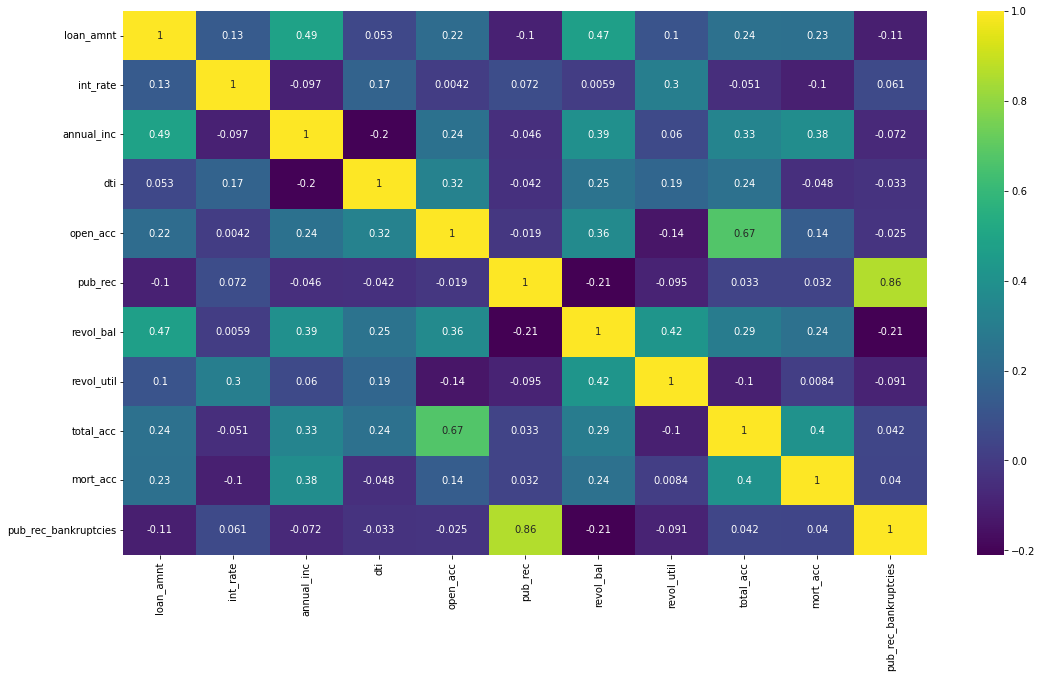

In [11]:
plt.figure(figsize=(18,10))
sns.heatmap(df.corr(method='spearman'),annot=True,cmap='viridis')
plt.show()

# Exploratory Data Analysis:

In [12]:
1). The no. of people who have paid fully and the no. of people who are charged off

SyntaxError: unmatched ')' (601804257.py, line 1)

In [13]:
df.groupby(by='loan_status')['loan_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,77673.0,15126.300967,8505.090557,1000.0,8525.0,14000.0,20000.0,40000.0
Fully Paid,318357.0,13866.878771,8302.319699,500.0,7500.0,12000.0,19225.0,40000.0


In [14]:
df.loan_status.value_counts(normalize=True)*100

Fully Paid     80.387092
Charged Off    19.612908
Name: loan_status, dtype: float64

In [ ]:
2). The majority of ownership as Mortgage and Rent

In [15]:
df['home_ownership'].value_counts()

MORTGAGE    198348
RENT        159790
OWN          37746
OTHER          112
NONE            31
ANY              3
Name: home_ownership, dtype: int64

In [16]:
df['issue_d']=pd.to_datetime(df['issue_d'])
df['earliest_cr_line']=pd.to_datetime(df['earliest_cr_line'])

In [17]:
df['earliest_cr_line']

0        1990-06-01
1        2004-07-01
2        2007-08-01
3        2006-09-01
4        1999-03-01
            ...    
396025   2004-11-01
396026   2006-02-01
396027   1997-03-01
396028   1990-11-01
396029   1998-09-01
Name: earliest_cr_line, Length: 396030, dtype: datetime64[ns]

In [18]:
df['title'].describe()

count                 394275
unique                 48817
top       Debt consolidation
freq                  152472
Name: title, dtype: object

In [19]:
df['title'].value_counts()[:20]

Debt consolidation           152472
Credit card refinancing       51487
Home improvement              15264
Other                         12930
Debt Consolidation            11608
Major purchase                 4769
Consolidation                  3852
debt consolidation             3547
Business                       2949
Debt Consolidation Loan        2864
Medical expenses               2742
Car financing                  2139
Credit Card Consolidation      1775
Vacation                       1717
Moving and relocation          1689
consolidation                  1595
Personal Loan                  1591
Consolidation Loan             1299
Home Improvement               1268
Home buying                    1183
Name: title, dtype: int64

In [20]:
df['title']=df.title.str.lower()

In [21]:
df['title'].value_counts()[:20]

debt consolidation           168108
credit card refinancing       51781
home improvement              17117
other                         12993
consolidation                  5583
major purchase                 4998
debt consolidation loan        3513
business                       3017
medical expenses               2820
credit card consolidation      2638
personal loan                  2460
car financing                  2160
credit card payoff             1904
consolidation loan             1887
vacation                       1866
credit card refinance          1832
moving and relocation          1693
consolidate                    1528
personal                       1465
home buying                    1196
Name: title, dtype: int64

# Visualization of Target value with rest data

[Text(0, 0, 'A1'),
 Text(1, 0, 'A2'),
 Text(2, 0, 'A3'),
 Text(3, 0, 'A4'),
 Text(4, 0, 'A5'),
 Text(5, 0, 'B1'),
 Text(6, 0, 'B2'),
 Text(7, 0, 'B3'),
 Text(8, 0, 'B4'),
 Text(9, 0, 'B5'),
 Text(10, 0, 'C1'),
 Text(11, 0, 'C2'),
 Text(12, 0, 'C3'),
 Text(13, 0, 'C4'),
 Text(14, 0, 'C5'),
 Text(15, 0, 'D1'),
 Text(16, 0, 'D2'),
 Text(17, 0, 'D3'),
 Text(18, 0, 'D4'),
 Text(19, 0, 'D5'),
 Text(20, 0, 'E1'),
 Text(21, 0, 'E2'),
 Text(22, 0, 'E3'),
 Text(23, 0, 'E4'),
 Text(24, 0, 'E5'),
 Text(25, 0, 'F1'),
 Text(26, 0, 'F2'),
 Text(27, 0, 'F3'),
 Text(28, 0, 'F4'),
 Text(29, 0, 'F5'),
 Text(30, 0, 'G1'),
 Text(31, 0, 'G2'),
 Text(32, 0, 'G3'),
 Text(33, 0, 'G4'),
 Text(34, 0, 'G5')]

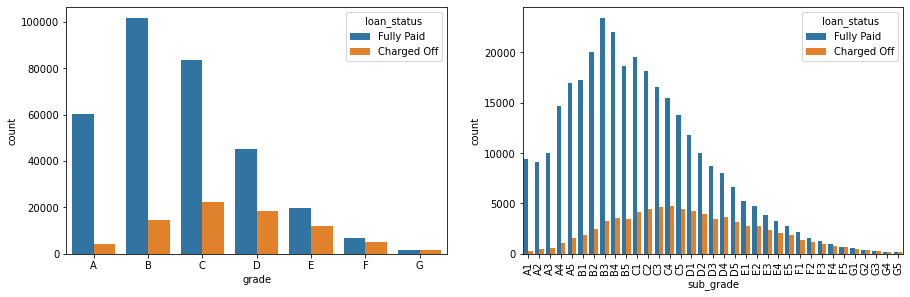

In [22]:
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
grade = sorted(df.grade.unique().tolist())
sns.countplot(x='grade', data=df, hue='loan_status', order=grade)

plt.subplot(2, 2, 2)
sub_grade = sorted(df.sub_grade.unique().tolist())
g = sns.countplot(x='sub_grade', data=df, hue='loan_status', order=sub_grade)
g.set_xticklabels(g.get_xticklabels(), rotation=90)

[Text(0, 0, 'vacation'),
 Text(1, 0, 'debt_consolidation'),
 Text(2, 0, 'credit_card'),
 Text(3, 0, 'home_improvement'),
 Text(4, 0, 'small_business'),
 Text(5, 0, 'major_purchase'),
 Text(6, 0, 'other'),
 Text(7, 0, 'medical'),
 Text(8, 0, 'wedding'),
 Text(9, 0, 'car'),
 Text(10, 0, 'moving'),
 Text(11, 0, 'house'),
 Text(12, 0, 'educational'),
 Text(13, 0, 'renewable_energy')]

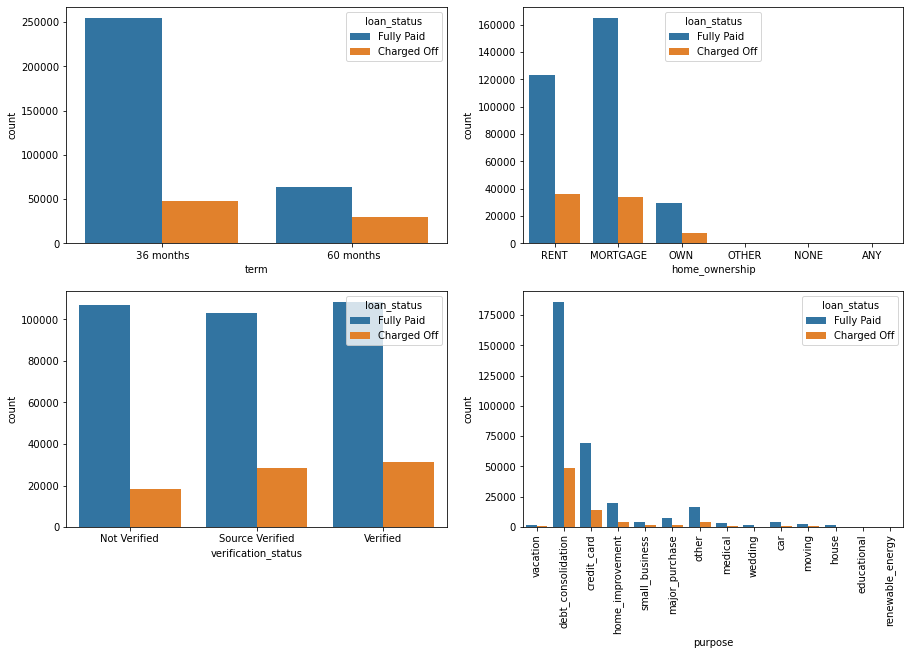

In [23]:
plt.figure(figsize=(15,20))

plt.subplot(4,2,1)
sns.countplot(x='term',data=df,hue='loan_status')

plt.subplot(4,2,2)
sns.countplot(x='home_ownership',data=df,hue='loan_status')

plt.subplot(4,2,3)
sns.countplot(x='verification_status',data=df,hue='loan_status')

plt.subplot(4,2,4)
g=sns.countplot(x='purpose',data=df,hue='loan_status')
g.set_xticklabels(g.get_xticklabels(),rotation=90)

In [ ]:
The grade of majority of people those who have fully paid the loan is 'B' and have subgrade 'B3'.

So from that we can infer that people with grade 'B' and subgrade 'B3' are more likely to fully pay the loan.

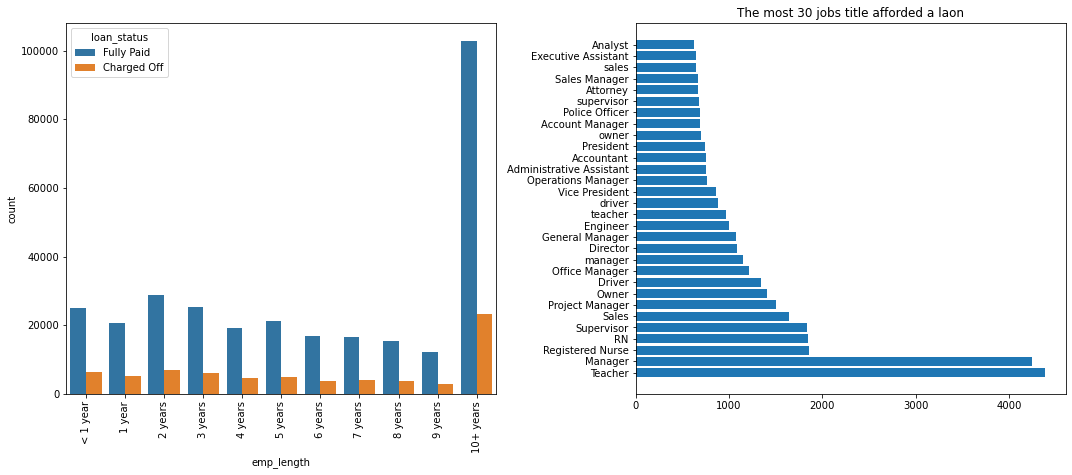

In [24]:
plt.figure(figsize=(15,12))

plt.subplot(2,2,1)
order = ['< 1 year', '1 year', '2 years', '3 years', '4 years', '5 years', 
          '6 years', '7 years', '8 years', '9 years', '10+ years',]
g=sns.countplot(x='emp_length',data=df,hue='loan_status',order=order)
g.set_xticklabels(g.get_xticklabels(),rotation=90)

plt.subplot(2,2,2)
plt.barh(df.emp_title.value_counts()[:30].index,df.emp_title.value_counts()[:30])
plt.title("The most 30 jobs title afforded a laon")
plt.tight_layout()

In [ ]:
Manager and Teacher are the most afforded loan on titles

# Feature Engineering


In [25]:
df.pub_rec.unique()

array([ 0.,  1.,  2.,  3.,  4.,  6.,  5.,  8.,  9., 10., 11.,  7., 19.,
       13., 40., 17., 86., 12., 24., 15.])

In [26]:
df.mort_acc.unique()

array([ 0.,  3.,  1.,  4.,  2.,  6.,  5., nan, 10.,  7., 12., 11.,  8.,
        9., 13., 14., 22., 34., 15., 25., 19., 16., 17., 32., 18., 24.,
       21., 20., 31., 28., 30., 23., 26., 27.])

In [27]:
df.pub_rec_bankruptcies.unique()

array([ 0.,  1.,  2.,  3., nan,  4.,  5.,  6.,  7.,  8.])

In [ ]:
#above are high outlier columns. We dont want to delete these records since someone whos taken a loan for the 
#first time may have low bankruptucy record
#so im just flagging anything more than 0 as 1

In [28]:
def pub_rec(number):
    if number == 0.0:
        return 0
    else:
        return 1
    
def mort_acc(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number
    
    
def pub_rec_bankruptcies(number):
    if number == 0.0:
        return 0
    elif number >= 1.0:
        return 1
    else:
        return number

In [29]:
df['pub_rec']=df.pub_rec.apply(pub_rec)
df['mort_acc']=df.mort_acc.apply(mort_acc)
df['pub_rec_bankruptcies']=df.pub_rec_bankruptcies.apply(pub_rec_bankruptcies)

<AxesSubplot:xlabel='pub_rec_bankruptcies', ylabel='count'>

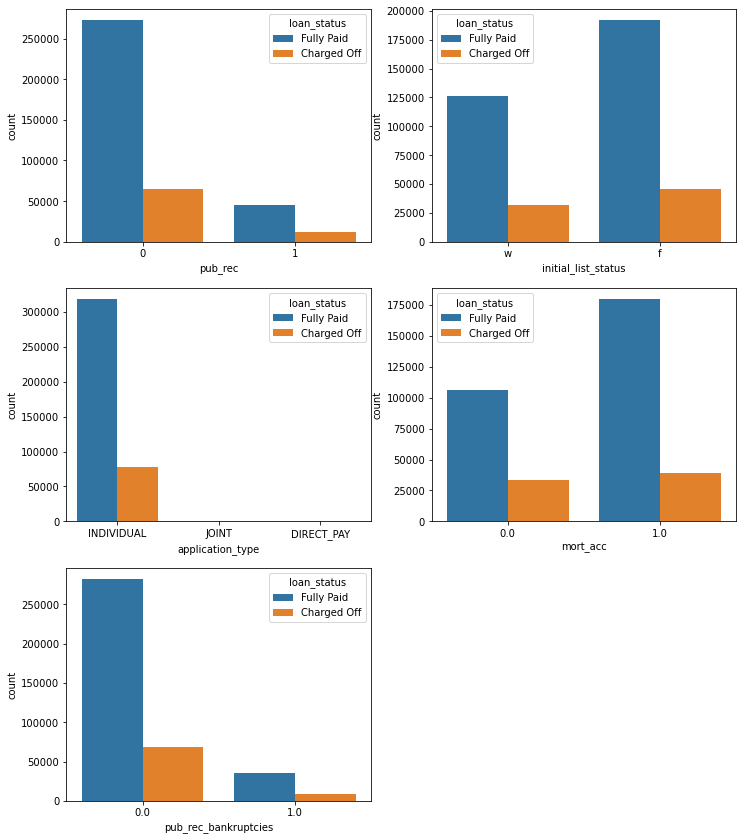

In [30]:
plt.figure(figsize=(12,30))

plt.subplot(6,2,1)
sns.countplot(x='pub_rec',data=df,hue='loan_status')

plt.subplot(6,2,2)
sns.countplot(x='initial_list_status',data=df,hue='loan_status')

plt.subplot(6,2,3)
sns.countplot(x='application_type',data=df,hue='loan_status')

plt.subplot(6,2,4)
sns.countplot(x='mort_acc',data=df,hue='loan_status')

plt.subplot(6,2,5)
sns.countplot(x='pub_rec_bankruptcies',data=df,hue='loan_status')

In [31]:
# handeling null values in the data

# Mapping of target variable 

df['loan_status']=df.loan_status.map({'Fully Paid':0, 'Charged Off':1})

In [32]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                9.543469
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [ ]:
# max number of Null values are in "mort_acc" colume -> close to 10% , we need to handel this. 
#replacing null value with 'mean of mort_acc according to total_acc_avg' -> targate encoding

In [33]:
# Mean Target Imputaion


df.groupby(by='total_acc').mean()

,loan_amnt,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,mort_acc,pub_rec_bankruptcies
total_acc,,,,,,,,,,,
2.0,6672.222222,15.801111,64277.777778,0.222222,2.279444,1.611111,0.000000,2860.166667,53.527778,0.000000,0.000000
3.0,6042.966361,15.615566,41270.753884,0.220183,6.502813,2.611621,0.033639,3382.807339,49.991022,0.046243,0.015480
4.0,7587.399031,15.069491,42426.565969,0.214055,8.411963,3.324717,0.033118,4874.231826,58.477400,0.062140,0.019672
5.0,7845.734714,14.917564,44394.098003,0.203156,10.118328,3.921598,0.055720,5475.253452,56.890311,0.090789,0.039187
6.0,8529.019843,14.651752,48470.001156,0.215874,11.222542,4.511119,0.076634,6546.374957,57.812483,0.121983,0.050947
...,...,...,...,...,...,...,...,...,...,...,...
124.0,23200.000000,17.860000,66000.000000,1.000000,14.040000,43.000000,0.000000,25497.000000,75.400000,1.000000,0.000000
129.0,25000.000000,7.890000,200000.000000,0.000000,8.900000,48.000000,0.000000,27659.000000,8.300000,1.000000,0.000000
135.0,24000.000000,15.410000,82000.000000,0.000000,33.850000,57.000000,0.000000,35715.000000,50.800000,1.000000,0.000000


In [62]:
#mean of mort_acc according to total_acc_avg

total_acc_avg=df.groupby(by='total_acc').mean().mort_acc
total_acc_avg

total_acc
2.0     0.000000
3.0     0.021053
4.0     0.044667
5.0     0.066265
6.0     0.095202
7.0     0.137775
8.0     0.177914
9.0     0.207400
10.0    0.229576
11.0    0.275888
12.0    0.308924
13.0    0.336432
14.0    0.361865
15.0    0.404363
16.0    0.423386
17.0    0.566068
18.0    0.574509
19.0    0.600126
20.0    0.607935
21.0    0.634085
22.0    0.647032
23.0    0.660298
24.0    0.675786
25.0    0.687963
26.0    0.696279
27.0    0.711472
28.0    0.709635
29.0    0.722330
30.0    0.739502
31.0    0.748945
32.0    0.761520
33.0    0.759137
34.0    0.770816
35.0    0.776430
36.0    0.782616
37.0    0.787402
38.0    0.785010
39.0    0.792069
40.0    0.797454
41.0    0.792252
42.0    0.808146
43.0    0.810139
44.0    0.817659
45.0    0.807707
46.0    0.811970
47.0    0.822071
48.0    0.829564
49.0    0.831764
50.0    0.841804
51.0    0.799842
52.0    0.833042
53.0    0.820166
54.0    0.814286
55.0    0.835544
56.0    0.820669
57.0    0.838078
58.0    0.830709
59.0    0.825328
Name

In [35]:
def fill_mort_acc(total_acc,mort_acc):
    if np.isnan(mort_acc):
        return total_acc_avg[total_acc].round()
    else:
        return mort_acc

In [36]:
df['mort_acc']=df.apply(lambda x: fill_mort_acc(x['total_acc'],x['mort_acc']),axis=1)

In [37]:
df.isnull().sum()/len(df)*100

loan_amnt               0.000000
term                    0.000000
int_rate                0.000000
grade                   0.000000
sub_grade               0.000000
emp_title               5.789208
emp_length              4.621115
home_ownership          0.000000
annual_inc              0.000000
verification_status     0.000000
issue_d                 0.000000
loan_status             0.000000
purpose                 0.000000
title                   0.443148
dti                     0.000000
earliest_cr_line        0.000000
open_acc                0.000000
pub_rec                 0.000000
revol_bal               0.000000
revol_util              0.069692
total_acc               0.000000
initial_list_status     0.000000
application_type        0.000000
mort_acc                0.000000
pub_rec_bankruptcies    0.135091
address                 0.000000
dtype: float64

In [ ]:
# now we have the max null values not more than 5%..... Thus we can drop those values from the data set

In [38]:
df.dropna(inplace=True)

In [39]:
df.shape

(370622, 26)

<AxesSubplot:xlabel='loan_status', ylabel='count'>

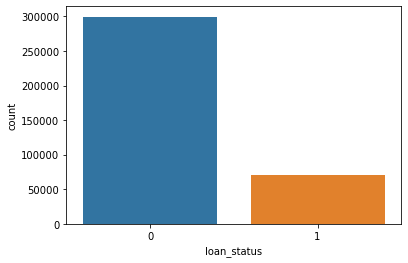

In [40]:
sns.countplot(x= df['loan_status'])

In [ ]:
# since the data is bised , the motel will work more efficient toward 0 'fully paid' ->  we can apply SMOTE here

In [ ]:
# handeling Outliers

In [41]:
numerical_data=df.select_dtypes(include='number')
num_cols=numerical_data.columns
len(num_cols)


12

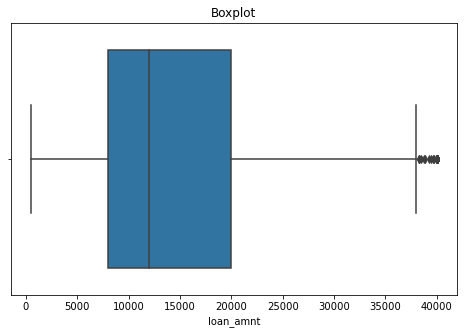

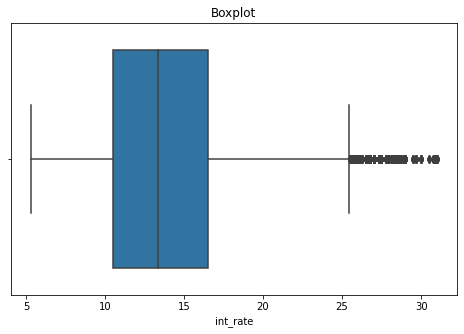

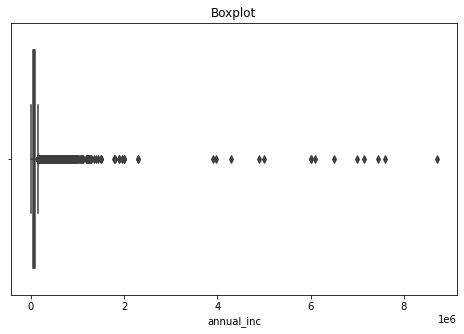

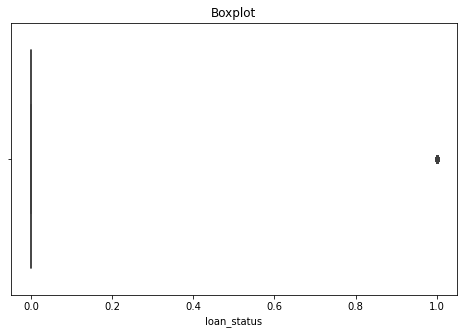

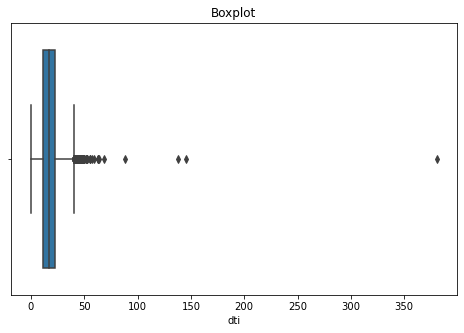

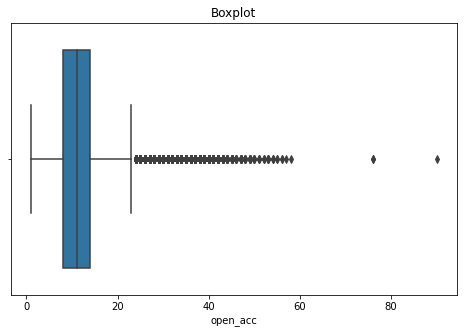

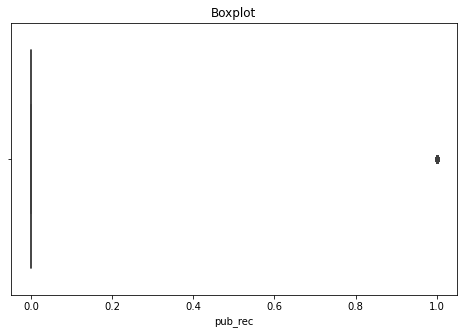

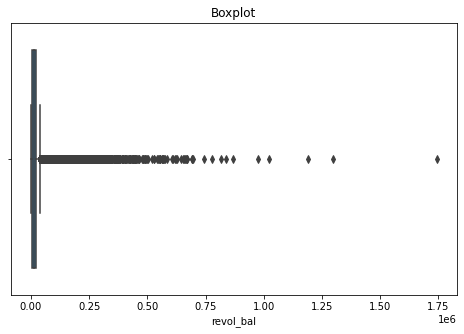

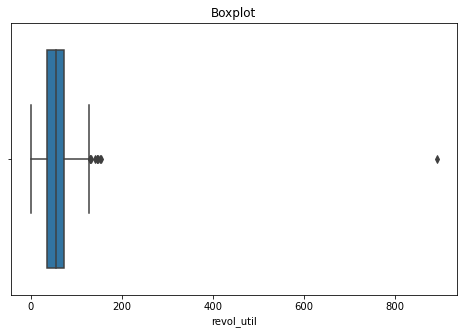

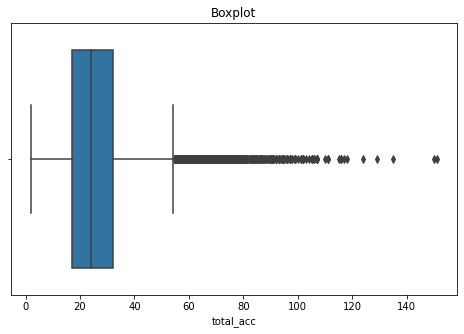

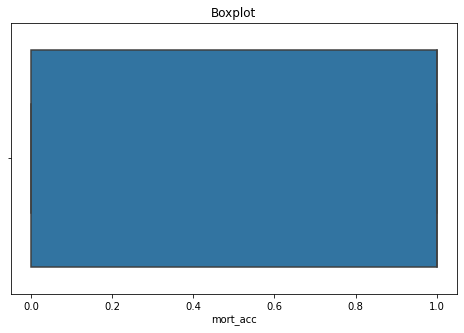

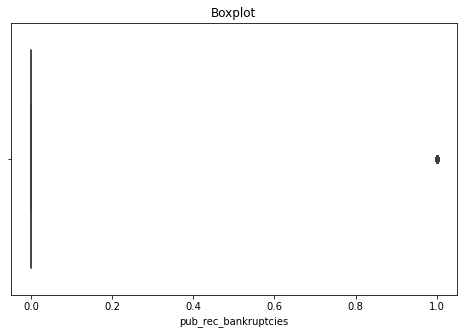

In [42]:
def box_plot(col):
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df[col])
    plt.title('Boxplot')
    plt.show()
    
for col in num_cols:
    box_plot(col)

In [43]:
for col in num_cols:
    mean=df[col].mean()
    std=df[col].std()
    
    upper_limit=mean+3*std
    lower_limit=mean-3*std
    
    df=df[(df[col]<upper_limit) & (df[col]>lower_limit)]
    
df.shape

(354519, 26)

In [44]:
#Data Preprocesing (converting all integers into numbers data type)
term_values={' 36 months': 36, ' 60 months':60}
df['term'] = df.term.map(term_values)

In [45]:
df['initial_list_status'].unique()

array(['w', 'f'], dtype=object)

In [46]:
list_status = {'w': 0, 'f': 1}
df['initial_list_status'] = df.initial_list_status.map(list_status)

In [47]:
df['zip_code'] = df.address.apply(lambda x: x[-5:])

In [49]:
df['zip_code'].value_counts(normalize=True)*100

70466    14.382022
30723    14.277373
22690    14.268347
48052    14.127028
00813    11.610097
29597    11.537322
05113    11.516731
93700     2.774746
11650     2.772771
86630     2.733563
Name: zip_code, dtype: float64

In [50]:
# Dropping some variables which seems no significance in the analysis as below 
df.drop(columns=['issue_d', 'emp_title', 'title', 'sub_grade',
                   'address', 'earliest_cr_line', 'emp_length'], 
                   axis=1, inplace=True)

In [51]:
#one Hot Encoding: 
dummies=['purpose', 'zip_code', 'grade', 'verification_status', 'application_type', 'home_ownership']
df=pd.get_dummies(df,columns=dummies,drop_first=True)

In [52]:
df.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,...,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,0,26.24,16.0,0,36369.0,41.8,...,0,0,0,1,0,0,0,0,0,1
1,8000.0,36,11.99,65000.0,0,22.05,17.0,0,20131.0,53.3,...,0,0,0,1,0,1,0,0,0,0
2,15600.0,36,10.49,43057.0,0,12.79,13.0,0,11987.0,92.2,...,0,1,0,1,0,0,0,0,0,1
3,7200.0,36,6.49,54000.0,0,2.60,6.0,0,5472.0,21.5,...,0,0,0,1,0,0,0,0,0,1
4,24375.0,60,17.27,55000.0,1,33.95,13.0,0,24584.0,69.8,...,0,0,1,1,0,1,0,0,0,0


In [53]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

df.head()

,loan_amnt,term,int_rate,annual_inc,loan_status,dti,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,mort_acc,pub_rec_bankruptcies,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_house,purpose_major_purchase,purpose_medical,purpose_moving,purpose_other,purpose_renewable_energy,purpose_small_business,purpose_vacation,purpose_wedding,zip_code_05113,zip_code_11650,zip_code_22690,zip_code_29597,zip_code_30723,zip_code_48052,zip_code_70466,zip_code_86630,zip_code_93700,grade_B,grade_C,grade_D,grade_E,grade_F,grade_G,verification_status_Source Verified,verification_status_Verified,application_type_INDIVIDUAL,application_type_JOINT,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,10000.0,36,11.44,117000.0,0,26.24,16.0,0,36369.0,41.8,25.0,0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,8000.0,36,11.99,65000.0,0,22.05,17.0,0,20131.0,53.3,27.0,1,1.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0
2,15600.0,36,10.49,43057.0,0,12.79,13.0,0,11987.0,92.2,26.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,1
3,7200.0,36,6.49,54000.0,0,2.60,6.0,0,5472.0,21.5,13.0,1,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
4,24375.0,60,17.27,55000.0,1,33.95,13.0,0,24584.0,69.8,43.0,1,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,1,0,0,0,0


In [55]:
df.shape

(354519, 51)

In [ ]:
#Data Preparation for Modelling

In [56]:
X=df.drop('loan_status',axis=1)
y=df['loan_status']

In [57]:
X_train, X_test, y_train, y_test =train_test_split(X,y,test_size=0.30,stratify=y,random_state=42)

In [58]:
print(X_train.shape)
print(X_test.shape)

(248163, 50)
(106356, 50)


In [59]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Logistic Regression

In [60]:
logreg=LogisticRegression(max_iter=1000)
logreg.fit(X_train,y_train)

LogisticRegression(max_iter=1000)

In [61]:
y_pred = logreg.predict(X_test)
print('Accuracy of Logistic Regression Classifier on test set: {:.3f}'.format(logreg.score(X_test, y_test)))

Accuracy of Logistic Regression Classifier on test set: 0.890


# Confusion Matrix

In [63]:
confusion_matrix=confusion_matrix(y_test,y_pred)
print(confusion_matrix)

[[85363   525]
 [11131  9337]]


# 1.  Classification Report

In [64]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.88      0.99      0.94     85888
           1       0.95      0.46      0.62     20468

    accuracy                           0.89    106356
   macro avg       0.92      0.73      0.78    106356
weighted avg       0.90      0.89      0.87    106356



# 2. ROC AUC curve 
 (receiver operating characteristic curve)- Performance graph at all thresholds ,
 Graph b/w TPR and FPR 
 TPR=(TP)/(TP+FN)    : Recall
 FPR=(FP)/(FP+TN)

In [ ]:
# AUC (Area under the ROC Curve) 
#provides an aggregate measure of performance across all possible classification thresholds
#

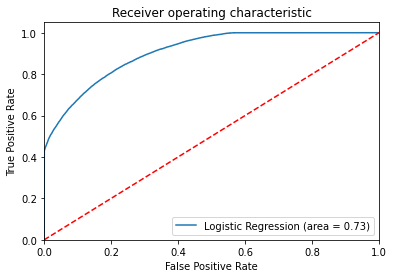

In [65]:
logit_roc_auc=roc_auc_score(y_test,logreg.predict(X_test))
fpr,tpr,thresholds=roc_curve(y_test,logreg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr,tpr,label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

An AU-ROC value of 0.73 suggests that, on average, the model has a good ability to distinguish between the positive and negative classes, but there is room for improvement.

# 3. Precision recall curve 

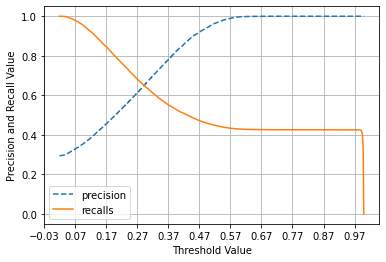

In [69]:
def precission_recall_curve_plot(y_test,pred_proba_c1):
    precisions, recalls, thresholds = precision_recall_curve(y_test,pred_proba_c1)
    
    threshold_boundary = thresholds.shape[0]
    #plot precision
    plt.plot(thresholds,precisions[0:threshold_boundary],linestyle='--',label='precision')
    #plot recall
    plt.plot(thresholds,recalls[0:threshold_boundary],label='recalls')
    
    start,end=plt.xlim()
    plt.xticks(np.round(np.arange(start,end,0.1),2))
    
    plt.xlabel('Threshold Value')
    plt.ylabel('Precision and Recall Value')
    plt.legend()
    plt.grid()
    plt.show()

precission_recall_curve_plot(y_test,logreg.predict_proba(X_test)[:,1])

the best threshold would be 0.30 whers precision and realls 

In [ ]:
# Multi coliniarity- VIF Factor

VIF = 1/1-R2

In [71]:
def calc_vif(X):
    # Calculating the VIF
    vif=pd.DataFrame()
    vif['Feature']=X.columns
    vif['VIF']=[variance_inflation_factor(X.values,i) for i in range(X.shape[1])]
    vif['VIF']=round(vif['VIF'],2)
    vif=vif.sort_values(by='VIF',ascending=False)
    return vif

calc_vif(X)

,Feature,VIF
43,application_type_INDIVIDUAL,5000.13
45,home_ownership_MORTGAGE,2558.75
49,home_ownership_RENT,2141.06
48,home_ownership_OWN,463.45
2,int_rate,123.58
14,purpose_debt_consolidation,51.74
1,term,27.36
13,purpose_credit_card,18.75
5,open_acc,13.89
9,total_acc,12.69


vif value for application_type_individual is very high. so, dropping it and cheking again

In [72]:
X.drop(columns=['application_type_INDIVIDUAL'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
2,int_rate,123.58
44,home_ownership_MORTGAGE,80.33
48,home_ownership_RENT,64.57
14,purpose_debt_consolidation,51.74
1,term,27.36


In [73]:
X.drop(columns=['int_rate'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
43,home_ownership_MORTGAGE,67.23
47,home_ownership_RENT,53.69
13,purpose_debt_consolidation,51.74
1,term,27.32
12,purpose_credit_card,18.75


In [75]:
X.drop(columns=['home_ownership_MORTGAGE'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
1,term,23.35
13,purpose_debt_consolidation,22.35
4,open_acc,13.64
8,total_acc,12.69
7,revol_util,9.06


In [76]:
X.drop(columns=['term'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
12,purpose_debt_consolidation,18.37
3,open_acc,13.64
7,total_acc,12.65
6,revol_util,9.04
1,annual_inc,8.03


In [77]:
X.drop(columns=['purpose_debt_consolidation'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
3,open_acc,13.09
7,total_acc,12.64
6,revol_util,8.31
1,annual_inc,7.70
2,dti,7.58


In [78]:
X.drop(columns=['open_acc'],axis=1,inplace=True)
calc_vif(X)[:5]

,Feature,VIF
6,total_acc,8.23
5,revol_util,8.00
1,annual_inc,7.60
2,dti,7.02
0,loan_amnt,6.72


In [79]:
X=scaler.fit_transform(X)

kfold=KFold(n_splits=5)
accuracy=np.mean(cross_val_score(logreg,X,y,cv=kfold,scoring='accuracy',n_jobs=-1))
print("Cross Validation accuracy : {:.3f}".format(accuracy))

Cross Validation accuracy : 0.891


# Oversampling using SMOTE

In [81]:
sm=SMOTE(random_state=42)
X_train_res,y_train_res=sm.fit_resample(X_train,y_train.ravel())

In [82]:
X_train_res.shape

(400810, 50)

In [84]:
y_train_res.shape

(400810,)

In [85]:
print("After OverSampling, counts of label '1': {}".format(sum(y_train_res == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res == 0)))

After OverSampling, counts of label '1': 200405
After OverSampling, counts of label '0': 200405


In [86]:
lr1 = LogisticRegression(max_iter=1000)
lr1.fit(X_train_res, y_train_res)
predictions = lr1.predict(X_test)
  
# Classification Report
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.95      0.80      0.87     85888
           1       0.49      0.81      0.61     20468

    accuracy                           0.80    106356
   macro avg       0.72      0.80      0.74    106356
weighted avg       0.86      0.80      0.82    106356

